# Importación de librerias

In [149]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import scipy.stats as stats

from src.image_processing_functions import *

# Carga y visualización de imágenes

Visualizamos las imágenes `img1_tp.png` y `img2_tp.png` en escala de grises.

(np.float64(-0.5), np.float64(286.5), np.float64(287.5), np.float64(-0.5))

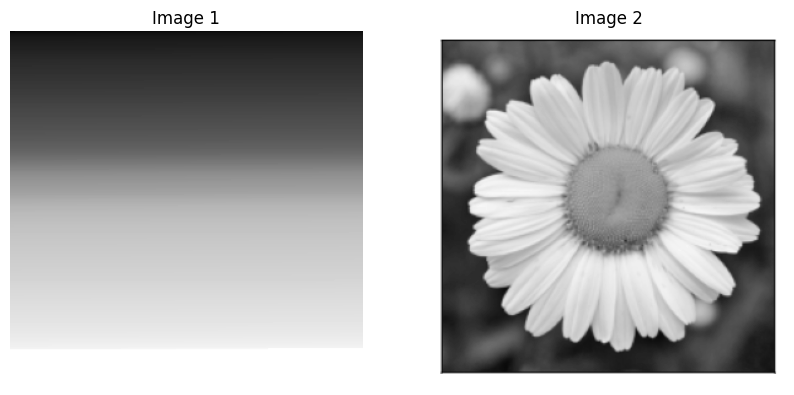

In [150]:
# path to images
path_img1 = 'resources/img1_tp.png'
path_img2 = 'resources/img2_tp.png'
# read images
img1 = cv2.imread(path_img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path_img2, cv2.IMREAD_GRAYSCALE)
# show the images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img1, cmap='gray')
axs[0].set_title('Image 1')
axs[0].axis('off')
axs[1].imshow(img2, cmap='gray')
axs[1].set_title('Image 2')
axs[1].axis('off')

# Visualización de histogramas

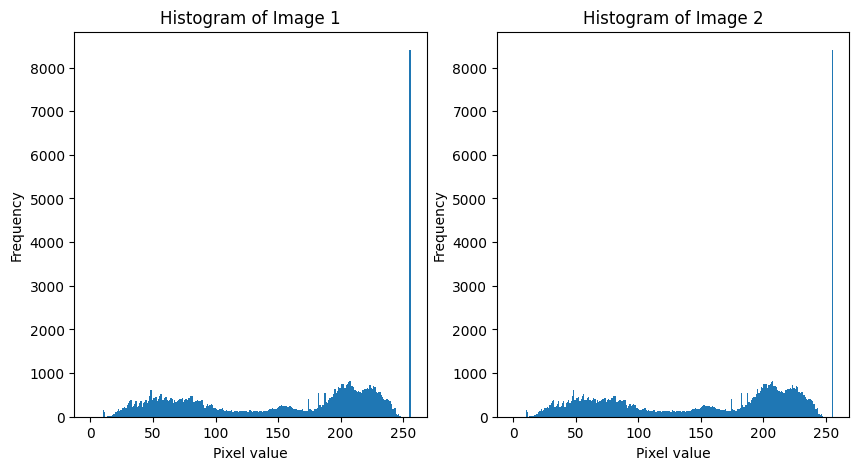

In [151]:
# calculate histograms
img1_hist, bins1 = np.histogram(img1.ravel(), bins=50, range=[0, 256])
img2_hist, bins2  = np.histogram(img2.ravel(), bins=50, range=[0, 256])
# show histograms
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(img1.ravel(),256,[0,256])
axs[0].set_title('Histogram of Image 1')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(img2.ravel(),256,[0,256])
axs[1].set_title('Histogram of Image 2')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')

plt.show()

In [152]:
# calculate the difference between the histograms
difference = np.sum(np.abs(img1_hist - img2_hist))

# print the difference
print('Difference between the histograms:', difference)

Difference between the histograms: 0


#### Análisis:

Se observa que la imagen `img1_tp.png` y la imagen `img2_tp.png` tienen la misma distribución de intensidades. Si bien visualmente se observa que ambas imágenes son diferentes, el histograma de ambas imágenes es el mismo. Esto es posible debido a que el histograma solo representa la distribución de intensidades de la imagen, y no el ordenamiento espacial de los píxeles.

Sobre tomar los histogramas como **features** para entrenar un modelo de **clasificación/detección**, lo encontrado en este ejercicio sugiere que no, ya que dos imágenes diferentes pueden tener el mismo histograma. Si tomaramos este caso por ejemplo, un modelo no sería capaz de distinguir entre ambas imágenes, aunque evidentemente son diferentes. Sin embargo, incluir la información del histograma como una característica adicional a otras más representativas de la imagen, como características basadas en formas o texturas, podría ser útil para mejorar el rendimiento del modelo. Aunque, posiblemente esto debería evaluarse para cada caso en particular.

# Segmentación 

Para la imagen `segmentacion.png` analice el histograma de los canales RGB. Segmente algunos de los 
elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes 
separadas.

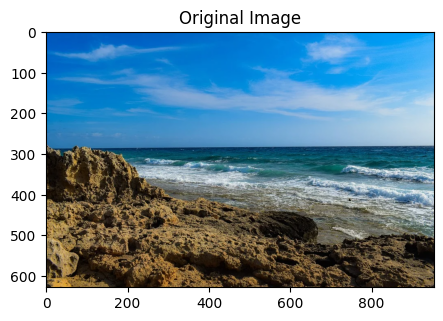

In [153]:
# path to the image
img_path = 'resources/segmentacion.png'
# read the image
original_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
# plot the image
plt.figure(figsize=(5, 5))
plt.imshow(original_img)
plt.title('Original Image')
plt.show()


## Análisis de histogramas

Mostramos los histogramas de los canales RGB de la imagen `segmentacion.png`. 

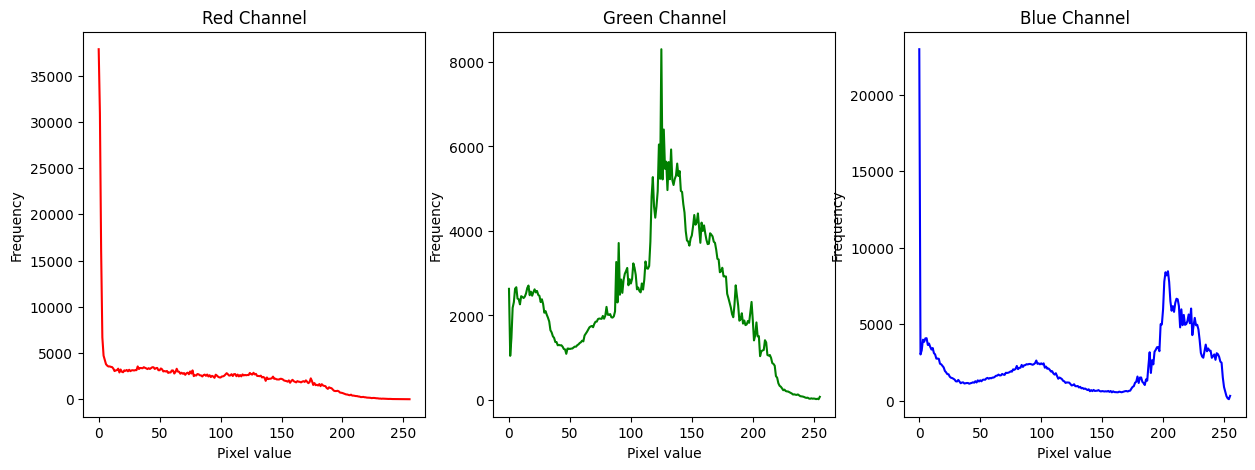

In [156]:
# Calculate the histograms for each channel
hist_r, bins_r = np.histogram(original_img[:, :, 0].ravel(), 256, [0, 256])
hist_g, bins_g = np.histogram(original_img[:, :, 1].ravel(), 256, [0, 256])
hist_b, bins_b = np.histogram(original_img[:, :, 2].ravel(), 256, [0, 256])

# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(hist_r, color='red')
axs[0].set_title('Red Channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].plot(hist_g, color='green')
axs[1].set_title('Green Channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].plot(hist_b, color='blue')
axs[2].set_title('Blue Channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

El histograma del **canal rojo** muestra una alta frecuencia de valores bajos, lo que indica una escasez de áreas predominantemente rojas, algo típico en un paisaje natural sin elementos rojos destacados. En contraste, el **canal verde** presenta un pico amplio alrededor de valores medios, lo que puede estar relacionado con la presencia de agua y la zona verdosa de la costa. El **canal azul** destaca con dos picos principales: uno en valores bajos y otro en el rango alto, señalando la existencia de áreas sombreadas y de regiones brillantes como el cielo y el mar.

## Segmentación de regiones

Segmentamos los elementos presentes en la imagen (agua, cielo, tierra) y mostramos las regiones en imágenes separadas.

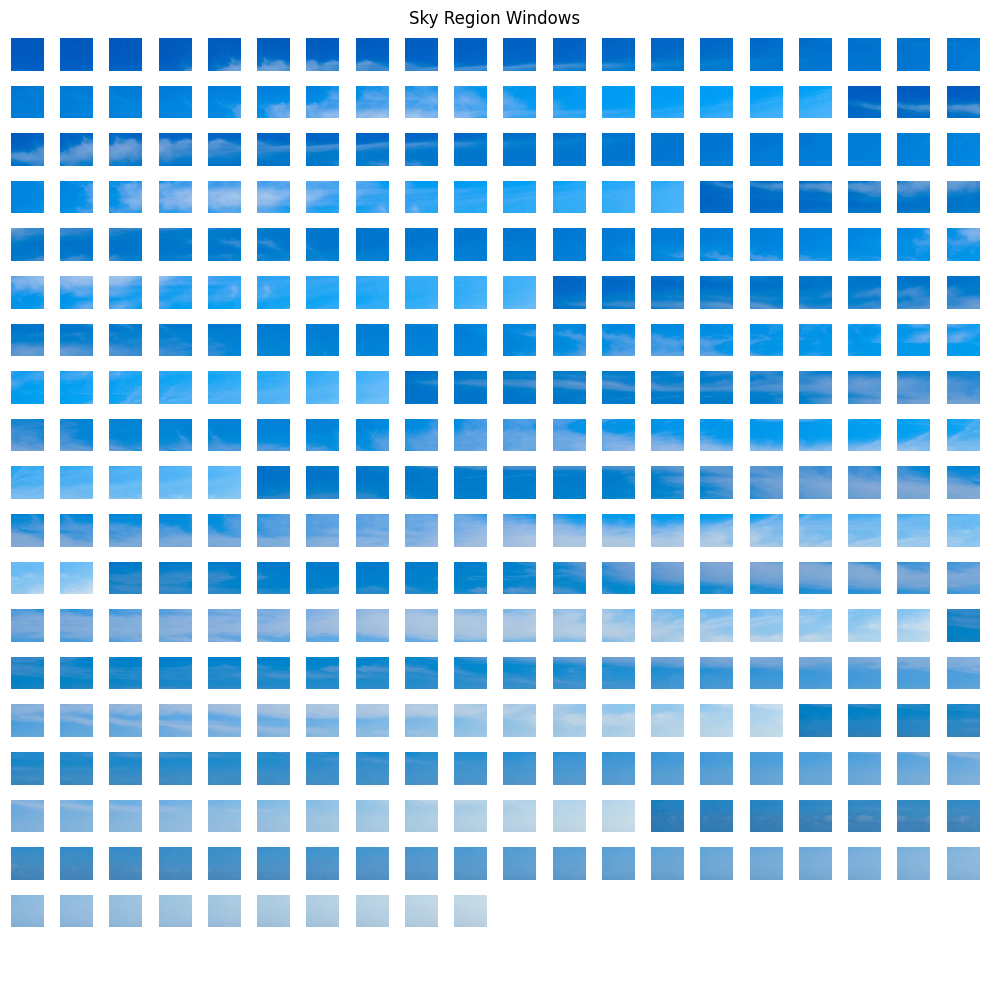

In [155]:
# Segment sky region
sky_segmented, sky_mask, sky_windows = segment_region(original_img, 0, original_img.shape[1], 0, 230)
plot_windows(sky_windows, title="Sky Region Windows")

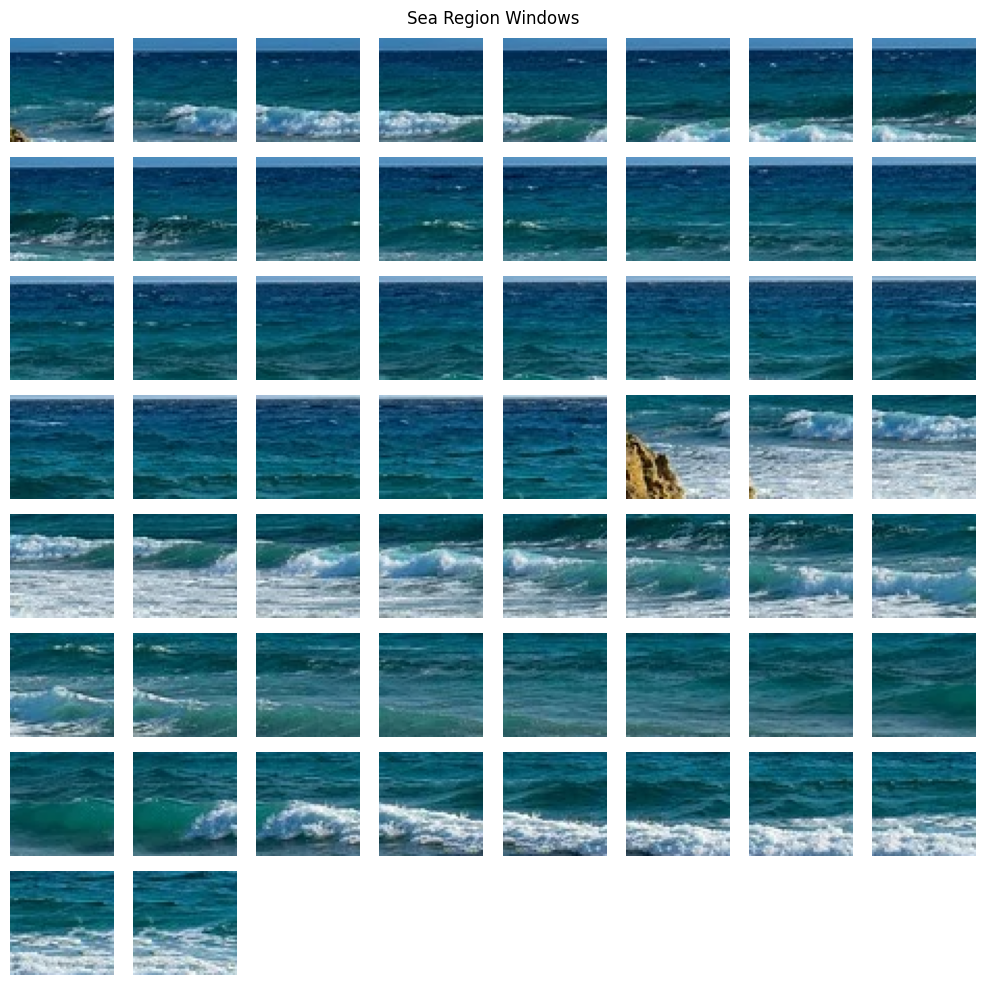

In [144]:
# Segment sea region
sea_segmented, sea_mask, sea_windows = segment_region(original_img, 200, original_img.shape[1], 280, 320)
plot_windows(sea_windows, title="Sea Region Windows")

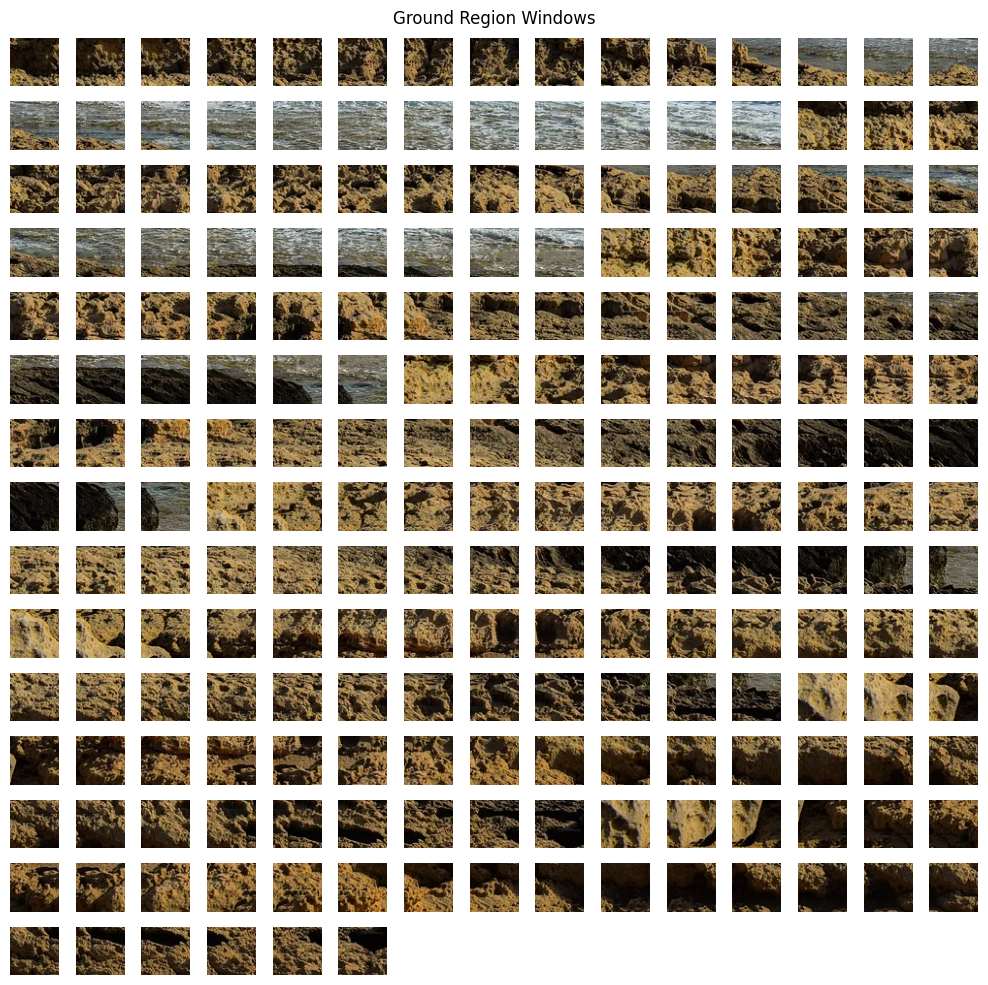

In [145]:
# Segment ground region
ground_segmented, ground_mask, ground_windows = segment_region(original_img, 0, 670, 380, original_img.shape[0])
plot_windows(ground_windows, title="Ground Region Windows")

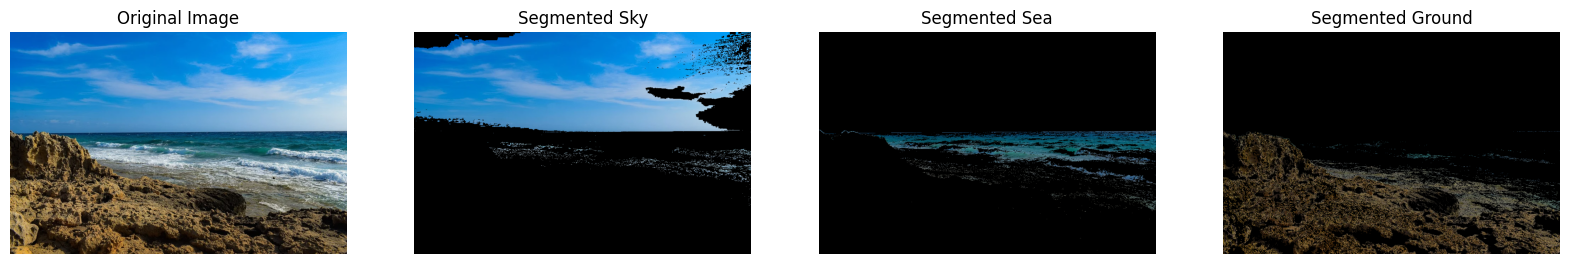

In [146]:
# Combine the masks
combined_mask = sky_mask | sea_mask | ground_mask

# Create the combined segmented image
combined_segmented_img = np.zeros_like(original_img)
combined_segmented_img[sky_mask] = original_img[sky_mask]
combined_segmented_img[sea_mask] = original_img[sea_mask]
combined_segmented_img[ground_mask] = original_img[ground_mask]

# Display the segmented images
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sky_segmented)
axs[1].set_title('Segmented Sky')
axs[1].axis('off')

axs[2].imshow(sea_segmented)
axs[2].set_title('Segmented Sea')
axs[2].axis('off')

axs[3].imshow(ground_segmented)
axs[3].set_title('Segmented Ground')
axs[3].axis('off')

plt.show()

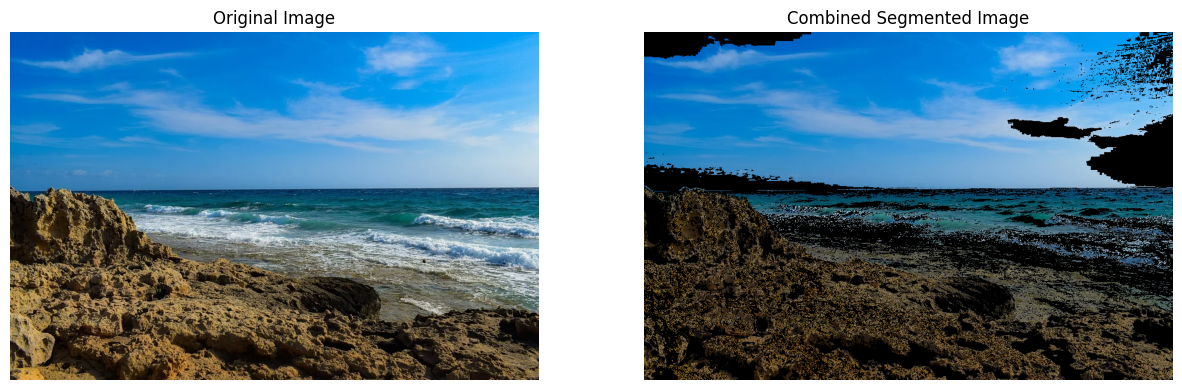

In [147]:
# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(combined_segmented_img)
axs[1].set_title('Combined Segmented Image')
axs[1].axis('off')

plt.show()

En la comparación entre las imágenes segmentadas y la imagen original, se observa que la segmentación se ha realizado de manera que se pueda cubrir las mayores porciones de cada región. Sin embargo, quedan detalles que no han podido ser segmentados correctamente, como pueden ser tonos muy oscuros o muy claros que no llegaron a ajustarse a los umbrales establecidos. 

Para apreciar mejor visualmente las regiones segmentadas, se pintarán las regiones segmentadas con colores sólidos. 

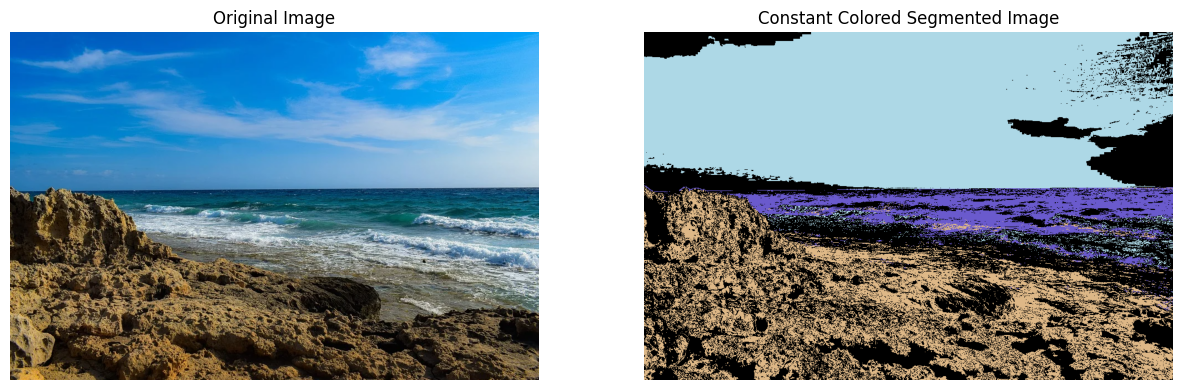

In [148]:
# Paint each region with a constant color
constant_colored_img = np.zeros_like(original_img)

sky_color = [173, 216, 230]
sea_color = [106, 90, 205]
ground_color = [222, 184, 135]

constant_colored_img[sky_mask] = sky_color
constant_colored_img[sea_mask] = sea_color
constant_colored_img[ground_mask] = ground_color

# Display the combined segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].imshow(original_img)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(constant_colored_img)
axs[1].set_title('Constant Colored Segmented Image')
axs[1].axis('off')

plt.show()